# Getting to know Pandas 

Pandas can be as simple or as complex as you need it to be. As an analysis toolkit, it's designed to be flexible and provide a wide range of functionality so that the same tool can be used for a variety of tasks. Because of this, it can be a little overwhelming at first. In this notebook we will introduce some of the essential pandas functionality and list a few best practices that will make learning pandas easier as you go.

By now, you should be comfortable with:

* Reading in a CSV file
* Inspecting the first five rows of your data
* Selecting columns / filtering rows
* Creating new columns from existing columns


## What's covered here

In this notebook you will learn:

* Basic indexing and working with dates
* Reading data from multiple sources
* Merging data (joins/vlookup)
* Groupby, pivot_table, transform, melt

Along the way, you will also learn pandas best practices in how to write your code. For further reading on mastering pandas syntax, [Minimally sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428) is an excellent resource.

# Tutorial Overview
This tutorial is divided into 4 parts:

* Test your knowledge
* Basic indexing
* Slicing, merging, and grouping data
* Exercises: Your turn!

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Test your knowledge
Before starting, try to complete the excercise below. 

Step 1: Choose a file to load

In [13]:
# we want to load the sales_fake.csv in the Support_Files directory
directory = 'data/'
## START YOUR CODE HERE
file_name = 'sales_fake.csv'
## END YOUR CODE HERE
path = directory + file_name

# check to make sure you have the right path
print(path)

data/sales_fake.csv


Step 2: Read your file into a pandas data frame and view the top 5 rows

In [ ]:
# remember, pandas has built-in methods for reading data. 
# If you can't remember which one to use, try pd.read<TAB> to view the available methods

## START YOUR CODE HERE
# read the csv
df = 
# view the top 5 rows
# remember, each dataframe also has built-in methods for working with the data.
# if you can't remember which one to use, try df.<TAB> to view the available methods
df
## END YOUR CODE HERE

# Basic Indexing

Pandas dataframes are a collection of rows and columns, organized by an index. The index is analogous to row numbers in excel or primary keys in SQL. Understanding and working with indexes allows us to easily filter, group, and manipulate our data. Additionally, pandas understands different types of indexes. Most notably, pandas has a DatetimeIndex which makes working dates very easy.

To begin, we will read in some data, inspect the index and set a new index. After that, we will explore the functionality with our new index

In [14]:
# use the same file from before
df = pd.read_csv(path)

In [15]:
print("What type of index?")
print("-> ", df.index, "\n")

print("Inspect some values:")
print("-> ", df.index.values, "\n")

# show the first 5 rows
df.head()

What type of index?
->  RangeIndex(start=0, stop=20605, step=1) 

Inspect some values:
->  [    0     1     2 ... 20602 20603 20604] 



,marketplace_id,order_day,order_week,gl,product_family,units,ops
0,1,2017-01-01,2017-01-07,Amazon_Pantry,Consumables,9460.696331,46576.224274
1,1,2017-01-02,2017-01-07,Amazon_Pantry,Consumables,13828.318507,61148.434296
2,1,2017-01-03,2017-01-07,Amazon_Pantry,Consumables,12308.348366,59960.632711
3,1,2017-01-04,2017-01-07,Amazon_Pantry,Consumables,11912.807101,58991.544654
4,1,2017-01-05,2017-01-07,Amazon_Pantry,Consumables,10817.883315,54032.017658


If I know the index, I can pull rows by their index

In [16]:
print(df.loc[3])

marketplace_id                1
order_day            2017-01-04
order_week           2017-01-07
gl                Amazon_Pantry
product_family      Consumables
units              11912.807101
ops                58991.544654
Name: 3, dtype: object


Or I can pull a whole range using `START:END` notation. This is known as "Slicing". For `[1:3]`, this means start index 1 and go up to 3 but don't include 3.

In [17]:
print(df.loc[1:3])

   marketplace_id   order_day  order_week             gl product_family  \
1               1  2017-01-02  2017-01-07  Amazon_Pantry    Consumables   
2               1  2017-01-03  2017-01-07  Amazon_Pantry    Consumables   
3               1  2017-01-04  2017-01-07  Amazon_Pantry    Consumables   

          units           ops  
1  13828.318507  61148.434296  
2  12308.348366  59960.632711  
3  11912.807101  58991.544654  


An integer index alone isn't particularly useful, so lets set a datetime index. Before we do that, we need to first understand data types in Python.

Basic data types are `float`, `integer`, `string`. A more advanced data type that python understands is `datetimes`. This is similar to programs like excel which will automatically try to detect a date column and treat it differently than a string or an integer.

Lets look at the data types in our current dataframe:

In [18]:
df.dtypes

marketplace_id      int64
order_day          object
order_week         object
gl                 object
product_family     object
units             float64
ops               float64
dtype: object

An object in python generally refers to a string or anything else that python wasn't able to automatically detect. As you can see, order_day and order_week are objects but we would like them to be dates.

In [19]:
# make a list of columns you want to change
columns_to_change = ['order_day', 'order_week']

# go through each column and update its dtype using pandas built-in function
for column in columns_to_change:
    df[column] = pd.to_datetime(df[column])

# check the output
df.dtypes

marketplace_id             int64
order_day         datetime64[ns]
order_week        datetime64[ns]
gl                        object
product_family            object
units                    float64
ops                      float64
dtype: object

In [20]:
# this gets me a whole new set of methods related to dates
new_dt_column = df['order_day']
df["day_name"] = new_dt_column.dt.day_name()

Now we have a column that pandas understands is a date. If you notice, our date column also matches our index, so instead of using the row index, let's index our data frame by date

In [21]:
df = df.set_index('order_day')
df.head()

,marketplace_id,order_week,gl,product_family,units,ops,day_name
order_day,,,,,,,
2017-01-01,1,2017-01-07,Amazon_Pantry,Consumables,9460.696331,46576.224274,Sunday
2017-01-02,1,2017-01-07,Amazon_Pantry,Consumables,13828.318507,61148.434296,Monday
2017-01-03,1,2017-01-07,Amazon_Pantry,Consumables,12308.348366,59960.632711,Tuesday
2017-01-04,1,2017-01-07,Amazon_Pantry,Consumables,11912.807101,58991.544654,Wednesday
2017-01-05,1,2017-01-07,Amazon_Pantry,Consumables,10817.883315,54032.017658,Thursday


Now, instead of a row number, we have a date for our index. Let's revisit our index methods

In [22]:
# get data for a particular date
print(df.loc['2017-01-15'].head())
# get data for a slice
print(df.loc['2017-02-15':'2017-02-20'].head())
# get data for a month
print(df.loc['2017-07'].head())

            marketplace_id order_week                      gl product_family  \
order_day                                                                      
2017-01-15               1 2017-01-21           Amazon_Pantry    Consumables   
2017-01-15               1 2017-01-21                 Apparel      Softlines   
2017-01-15               1 2017-01-21                     Art      Hardlines   
2017-01-15               1 2017-01-21  Art and Craft Supplies      Hardlines   
2017-01-15               1 2017-01-21              Automotive      Hardlines   

                   units            ops day_name  
order_day                                         
2017-01-15  12174.306544   57837.266537   Sunday  
2017-01-15  32991.826769  665125.652486   Sunday  
2017-01-15      0.601876     115.510917   Sunday  
2017-01-15    183.130444    2103.539509   Sunday  
2017-01-15  10286.426235  316251.803210   Sunday  
            marketplace_id order_week             gl product_family  \
order_day  

Now that our index knows about dates, we easily get some calendar view. For example, lets look at units by Month and Quarter:

In [23]:
print(df.resample('Q')['units'].sum()) 
print(df.resample('M')['units'].sum())

order_day
2017-03-31    4.244779e+07
2017-06-30    4.499966e+07
2017-09-30    4.924478e+07
2017-12-31    6.415063e+07
Freq: Q-DEC, Name: units, dtype: float64
order_day
2017-01-31    1.468871e+07
2017-02-28    1.296491e+07
2017-03-31    1.479417e+07
2017-04-30    1.441700e+07
2017-05-31    1.550550e+07
2017-06-30    1.507717e+07
2017-07-31    1.665600e+07
2017-08-31    1.700644e+07
2017-09-30    1.558234e+07
2017-10-31    1.689117e+07
2017-11-30    2.105286e+07
2017-12-31    2.620659e+07
Freq: M, Name: units, dtype: float64


# You try!

Using the same dataframe above (you can make sure it's there by running all the cells up til now), complete the following questions to test your understanding:

Step 1: create a new dataframe using the date index

In [ ]:
# filter to data for November and December and save it to a new df called nov_to_dec
nov_to_dec = 

nov_to_dec.head()

Step 2: Re-index your new data frame by product_family

In [ ]:
# hint: nov_to_dec.<TAB> will show you the available methods
nov_to_dec_reindexed = 

nov_to_dec_reindexed.head()

Step 3: Get the data only for "Consumables"

In [ ]:
# hint: remember, df.loc lets you grab data by index label
nov_to_dec_consumables = 

nov_to_dec_consumables.head()

Step 4: Sum units in nov_to_dec_consumables and divide it by all units in nov_to_dec. This tells you what percentage Consumables was of all product families in November and December

In [ ]:
total_consumables_nov_to_dec = 

In [ ]:
# hint: we still have a dataframe indexed by date, nov_to_dec. Try using that
total_units_nov_to_dec = 

In [ ]:
# run this cell

print(
    "Consumables were {:.1%} of all units From November to December.".format(
        total_consumables_nov_to_dec / total_units_nov_to_dec
    )
)

Normally, this isn't how you would go about getting an answer like this using pandas, but it does demonstrate how to easy it is to work with data using slices and indexes. We could have accomplished the same thing using special functions, filtering, or groupby's. Groupby is what we will cover next!

# Groupby's and aggregations

In the last example, we used resample to sum over units to see aggregations by different calendar dimensions. This highlights one of pandas most powerful features: **GroupBy**'s and **Aggregations**.

GroupBy's provide a very flexible way to organize your data and Aggregations create summary views. GroupBy/Aggregate in pandas is much like pivot tables in excel, with lots of extras on top. Pandas also includes `pivot_table`, `melt`, and `transform` methods for shaping data.

At a high level, a GroupBy is a logical way to split your data and then apply some operation to each split before returning the results. This is known as Split-Apply-Combine:

To get the sum of units and OPS by each product_family, first create a groupby object (this is similar to a dataframe, except broken up into chunks as in the picture above).  Then, pick the columns you want to aggregate (units and ops in this case) and apply the .sum() method.  Pandas will automatically aggregate each product family "chunk" and combine them into a single dataframe.

GroupBy is one of panda's most versatile features. Be sure to checkout panda's documentation on [Split-Apply-Combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [30]:
sales_by_product_family = df.groupby('product_family')[['units', 'ops']].sum()
print(sales_by_product_family)

                       units           ops
product_family                            
Consumables     4.901449e+07  9.719792e+08
Hardlines       1.084074e+08  3.384190e+09
Media           2.177083e+07  3.887892e+08
Softlines       2.165010e+07  6.960792e+08


In SQL, this is equivalent to:

`SELECT
    product_family
    ,SUM(units) AS units
    ,SUM(ops) AS ops
FROM
    df
GROUP BY
    product_family
;`

The above example involves using the .sum() method on a groupby object, but there is a more general approach that we recommend, using .aggregate().  In Python, and especially Pandas, there are many different ways to perform the same operation, and .aggregate() is a versatile method that can help narrow down your options.

In [31]:
sales_by_product_family = df.groupby('product_family')[['units', 'ops']].aggregate('sum')
print(sales_by_product_family)

                       units           ops
product_family                            
Consumables     4.901449e+07  9.719792e+08
Hardlines       1.084074e+08  3.384190e+09
Media           2.177083e+07  3.887892e+08
Softlines       2.165010e+07  6.960792e+08


This is particularly helpful if you want to use different aggregate functions for different columns, which you'll see in the next couple of examples.

Next, let's look at gl units by quarter, using the .resample() method:

In [35]:
gl_by_qtr = df.groupby(['gl'])[['units','ops']].resample('Q').mean().head(20)
gl_by_qtr

units           ops
gl                     order_day                             
Amazon_Pantry          2017-03-31  10921.128980  5.242582e+04
                       2017-06-30  10252.033755  4.989826e+04
                       2017-09-30  11291.901788  5.387170e+04
                       2017-12-31  11135.496160  5.203038e+04
Apparel                2017-03-31  31660.111356  6.361766e+05
                       2017-06-30  34952.186413  6.934654e+05
                       2017-09-30  36829.246950  7.247801e+05
                       2017-12-31  57012.728928  1.171544e+06
Art                    2017-03-31      0.935434  1.601986e+02
                       2017-06-30      1.478416  1.879448e+02
                       2017-09-30      1.428818  1.196353e+03
                       2017-12-31      1.231376  3.337749e+02
Art and Craft Supplies 2017-03-31    164.222845  1.991211e+03
                       2017-06-30    161.179402  1.941749e+03
                       2017-09-30    214.915889  2.671324e+03
                       2017-12-31    396.878487  6.094072e+03
Automotive             2017-03-31  11452.490354  4.095604e+05
                       2017-06-30  13443.292734  4.764392e+05
                       2017-09-30  13623.786909  4.742538e+05
                       2017-12-31  13849.150307  4.933325e+05

Let's look at a more general case without using resample:

In [38]:
column_list = ['product_family']
aggregations = {'units':['sum','mean'],'ops':['min','max', 'mean', 'std']}

df.groupby(column_list).aggregate(aggregations)

units                     ops                \
                         sum          mean       min           max   
product_family                                                       
Consumables     4.901449e+07   8985.240642  0.090388  3.381976e+06   
Hardlines       1.084074e+08  10219.404387  0.440191  6.605131e+06   
Media           2.177083e+07   8431.769999  0.139558  1.614658e+06   
Softlines       2.165010e+07  11045.968597  0.556560  2.670796e+06   

                                              
                         mean            std  
product_family                                
Consumables     178181.329149  297128.512288  
Hardlines       319022.410792  378172.070243  
Media           150576.770325  254548.980163  
Softlines       355142.447923  332283.938566

In [39]:
def summarize_data(df, cols, aggs):
    return df.groupby(cols).aggregate(aggs)

column_list = ['product_family', df.index.quarter]
aggregations = {'units':['min','max'],'ops':['sum','mean']}

summarize_data(df, column_list, aggregations)

units                          ops  \
                                 min            max           sum   
product_family order_day                                            
Consumables    1            0.034692   50756.372305  2.075939e+08   
               2            0.034680   52561.869777  2.210532e+08   
               3            0.034708  106296.996434  2.401105e+08   
               4            0.034667  113244.908337  3.032216e+08   
Hardlines      1            0.219582   40986.010161  6.673806e+08   
               2            0.034649   43616.066234  7.531589e+08   
               3            0.351740  105444.099619  8.287705e+08   
               4            0.034984  255925.390692  1.134880e+09   
Media          1            0.034676   71345.396536  9.344613e+07   
               2            0.034624   49615.001452  7.574689e+07   
               3           15.723320   85005.037182  9.872314e+07   
               4           16.189308  128430.054502  1.208731e+08   
Softlines      1            0.036805   38445.603531  1.367929e+08   
               2          795.038976   43718.094501  1.570315e+08   
               3            0.034658  110204.330606  1.713518e+08   
               4          198.405226  134754.967246  2.309031e+08   

                                         
                                   mean  
product_family order_day                 
Consumables    1          152754.905636  
               2          167211.198720  
               3          176163.223037  
               4          214898.338796  
Hardlines      1          255505.596678  
               2          284963.657763  
               3          310633.603211  
               4          422674.009058  
Media          1          143763.276162  
               2          117619.393752  
               3          153296.801970  
               4          187691.089175  
Softlines      1          301971.036737  
               2          345124.103621  
               3          342703.524756  
               4          418302.697030

# Pivot a dataframe using the .pivot_table() function

Just as in Excel, we can pivot our data, which typically involves swapping rows with columns and applying an aggregate function:

In [40]:
df_pivot = pd.pivot_table(data=df, index=df.index, columns='product_family', values='units', aggfunc='sum')
df_pivot.head()

product_family,Consumables,Hardlines,Media,Softlines
order_day,,,,
2017-01-01,104467.010325,211688.484896,52140.007166,39835.061817
2017-01-02,137732.111356,279720.766123,69765.862960,50933.915968
2017-01-03,132243.179295,279593.050424,76703.362539,46512.437495
2017-01-04,130234.835836,264975.041811,75100.633735,47089.022667
2017-01-05,120421.207782,258053.916394,73082.137475,47399.367667


Here, the "index" argument determines the row grouping (just like "rows" in an Excel pivot table).  The "columns" and "values" arguments are also the same as their Excel counterparts.

Note: a dataframe's columns can have indices just like its rows can.  An unintended consequence of using .pivot_table() is that it adds an index to the new dataframe's columns, so we'll use the line below to undo this:

In [41]:
df_pivot.columns = list(df_pivot.columns)

# Unpivot a dataframe using the .melt() function

Now we'll essentially undo the pivot transformation we just applied. Reversing a pivot is difficult in Excel, but it's one line in Pandas with .melt(). This function doesn't work very well with indices, so first we'll reset the order_day index so it becomes a column again:

In [42]:
df_pivot = df_pivot.reset_index()
df_pivot.head()

,order_day,Consumables,Hardlines,Media,Softlines
0,2017-01-01,104467.010325,211688.484896,52140.007166,39835.061817
1,2017-01-02,137732.111356,279720.766123,69765.862960,50933.915968
2,2017-01-03,132243.179295,279593.050424,76703.362539,46512.437495
3,2017-01-04,130234.835836,264975.041811,75100.633735,47089.022667
4,2017-01-05,120421.207782,258053.916394,73082.137475,47399.367667


In [43]:
df_unpivot = pd.melt(frame=df_pivot, id_vars=['order_day'], value_name='units', var_name='product_family')

# then set the index back to order_day
df_unpivot = df_unpivot.set_index('order_day')

df_unpivot.head()

,product_family,units
order_day,,
2017-01-01,Consumables,104467.010325
2017-01-02,Consumables,137732.111356
2017-01-03,Consumables,132243.179295
2017-01-04,Consumables,130234.835836
2017-01-05,Consumables,120421.207782


<AxesSubplot:xlabel='order_day'>

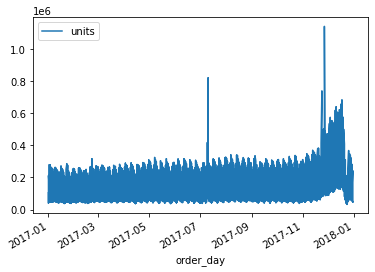

In [44]:
df_unpivot.plot()

In [45]:
df.shape

(20605, 7)

In [46]:
df_unpivot.shape

(1460, 2)

We have now unpivoted product_family so it is a column again.  Keep in mind we could have done this all in one line, including resetting and setting the index, but we broke it out into steps for illustration.

# Exercises: You try!

1) What is the GL with the highest OPS? (_hint:_ you can use the df.groupby(cols).aggregate({} syntax)

2) What percentage of the Consumables OPS does Amazon Pantry have?

3) What date had the highest total OPS?

4) Create pivot table of OPS with gl as the row headers and order_day as the columns

# Combining multiple data sets with pandas using Merge

In [47]:
import pandas as pd
%matplotlib inline

# define variables as much as possible
# this makes your code more re-usable and readable
# remember, a variable is where a value is stored, a string is the value
# file_path: variable to tell me where to find the file
# holidays_url: url for a list of holidays on github

holidays_url = 'https://gist.githubusercontent.com/shivaas/4758439/raw/'


In [48]:
# show reading a file without a header
holidays = pd.read_csv(holidays_url)
holidays.head()

,1,2012-01-02,New Year Day
0,2,2012-01-16,Martin Luther King Jr. Day
1,3,2012-02-20,Presidents Day (Washingtons Birthday)
2,4,2012-05-28,Memorial Day
3,5,2012-07-04,Independence Day
4,6,2012-09-03,Labor Day


In [49]:
# passing in the file names 
holidays = pd.read_csv(holidays_url, header=None, names=['date','holiday'])

# add in holiday date types
holidays.head()
holidays.dtypes

date       object
holiday    object
dtype: object

In [50]:
holidays['date'] = pd.to_datetime(holidays['date'])
holidays = holidays.set_index('date')

In [51]:
sales_data_with_holidays = pd.merge(df, holidays, right_index=True, left_index=True, how='left')

In [52]:
# sales_data_with_holidays['holiday'] = sales_data_with_holidays['holiday'].fillna('No holiday')
sales_data_with_holidays.columns

Index(['marketplace_id', 'order_week', 'gl', 'product_family', 'units', 'ops',
       'day_name', 'holiday'],
      dtype='object')

In [53]:
sales_data_with_holidays.head()

,marketplace_id,order_week,gl,product_family,units,ops,day_name,holiday
2017-01-01,1,2017-01-07,Amazon_Pantry,Consumables,9460.696331,46576.224274,Sunday,NaN
2017-01-01,1,2017-01-07,Apparel,Softlines,25747.301580,518385.466484,Sunday,NaN
2017-01-01,1,2017-01-07,Art,Hardlines,0.700692,134.004846,Sunday,NaN
2017-01-01,1,2017-01-07,Art and Craft Supplies,Hardlines,152.869492,1973.414864,Sunday,NaN
2017-01-01,1,2017-01-07,Automotive,Hardlines,9029.013707,281442.376425,Sunday,NaN


In [54]:
sales_data_with_holidays[~sales_data_with_holidays['holiday'].isnull()].head()

,marketplace_id,order_week,gl,product_family,units,ops,day_name,holiday
2017-01-02,1,2017-01-07,Amazon_Pantry,Consumables,13828.318507,61148.434296,Monday,New Year Day
2017-01-02,1,2017-01-07,Apparel,Softlines,33581.730644,662315.758715,Monday,New Year Day
2017-01-02,1,2017-01-07,Art,Hardlines,0.594952,194.296205,Monday,New Year Day
2017-01-02,1,2017-01-07,Art and Craft Supplies,Hardlines,182.589249,2297.702145,Monday,New Year Day
2017-01-02,1,2017-01-07,Automotive,Hardlines,11318.818093,385564.035064,Monday,New Year Day


# Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.
* Describe three examples when Pandas would be better than using Excel directly.
* Complete the next example that uses Pandas to clean a dataset. 

# Further Reading
This section provides more resources on the topic if you are looking to go deeper.

## Books
* Python for Data Analysis, by William McKinney. http://shop.oreilly.com/product/0636920023784.do

## APIs
* Pandas. https://pandas.pydata.org/

## Articles
* Getting started with Pandas in 5 minutes, on Towards Data Science. https://medium.com/bhavaniravi/python-pandas-tutorial-92018da85a33
* My Pandas Cheat Sheet, on Towards Data Science. https://towardsdatascience.com/my-python-pandas-cheat-sheet-746b11e44368
    
# Summary

In this tutorial, you used Pandas for more advanced data analysis. Specifically, you learned:
* Basic indexing and working with dates
* Reading data from multiple sources
* Merging data (joins/vlookup)
* Groupby, pivot_table, transform, melt

# Next

In the next section, you will use Pandas to explore a dataset. 